## 1. 프로젝트 목적 및 정의
영희와 철수는 부부관계입니다. 영희와 철수는 서로 같은 생활비 통장을 사용합니다. 경제관념을 가지기 위해서라고 하네요.
며칠 전, 영희는 이번달 생활비가 생각보다 부족하다는 것을 깨달았습니다. 영희는 통장을 함께 관리하고 있는 철수를 의심했고, 철수의 행적을 쫒고자 했습니다.   
그러나, 철수의 카드 사용내역이 워낙 많아 돈을 언제 무엇을 사느라 사용한 것인지 정리하기 힘들었습니다.   
이에 영희는 프로그램을 사용하여 철수의 카드 사용 내역을 정리하고, 철수가 돈을 언제 어디서 무엇을 사느라 사용한 것인지 찾으려 합니다.    
영희를 도와 철수의 행적을 찾아내 봅시다.  
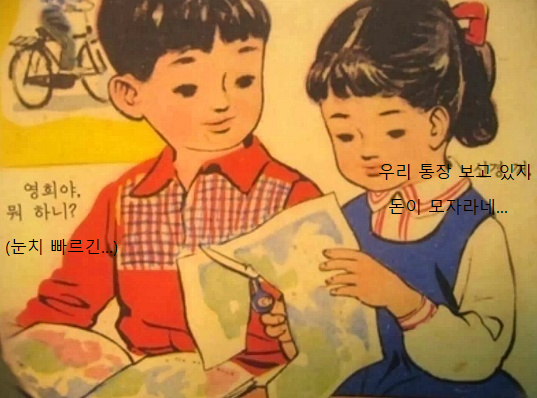

## 2. 데이터셋 불러오기

### 1. data 불러오기
결제 내역 파일을 불러온 뒤, 해당 파일의 처음 3개 열을 읽어보세요.
* 결제 내역 파일은 `credit.csv`라는 이름을 가졌습니다.
* `pd.read_csv(파일 경로)`를 사용하면 파일을 읽어올 수 있습니다.
* `df.head(n)`을 사용하면 첫 n개의 열을 읽어올 수 있습니다.

In [2]:
import pandas as pd #read_csv()와 head() 함수를 담은 모듈 pandas를 pd라는 이름으로 불러옵니다. 

df = pd.read_csv('credit.csv') # 파일을 읽어와 df에 저장해줍니다. 
df.head(3) # df에 저장된 파일의 첫 3줄을 읽어옵니다. 

,거래일자,거래시간,출금(원),입금(원),내용,잔액(원)
0,2022-08-16,18:01:17,20986.0,NaN,영철페이,68020.0
1,2022-08-15,19:06:07,8000.0,NaN,손큰영희순대국,89006.0
2,2022-08-15,14:40:29,10800.0,NaN,주식회사 철수,97006.0


## 3. 데이터 분석

### 1. data 길이 가져오기
불러온 데이터의 길이를 출력해보세요
* `len(x)`를 사용하면 x의 길이를 가져올 수 있습니다.

In [3]:
len(df) # df의 길이를 출력합니다. 

54

### 2. 데이터 전처리
nan값은 'not a number'라는 뜻으로 누락된 데이터를 의미합니다.  
철수의 카드 사용 내역 데이터에서 nan 값은 입금 혹은 출금이 이루어지지 않았다는 것입니다.   
즉 사용한 금액이 0원이라는 것이므로, nan값을 0으로 채우려고 합니다. 
* `df.fillna(value)`는 누락된 값을 원하는 값으로 변경하는 메서드입니다.   
`df.fillna(value)`를 사용하여 df에 존재하는 모든 nan 값을 원하는 value로 대체해주세요.

In [88]:
df = df.fillna(0)
df.head()  # head()는 행수를 지정하지 않은 경우 처음 5줄을 기본으로 읽어옵니다. 

,거래일자,거래시간,출금(원),입금(원),내용,잔액(원)
0,2022-08-16,18:01:17,20986.0,0.0,영철페이,68020.0
1,2022-08-15,19:06:07,8000.0,0.0,손큰영희순대국,89006.0
2,2022-08-15,14:40:29,10800.0,0.0,주식회사 철수,97006.0
3,2022-08-14,01:36:25,1000.0,0.0,영철페이,107806.0
4,2022-08-12,20:06:35,3000.0,0.0,CY PC방,108806.0


### 3. 시간별로 시각화
영희는 돈이 언제 많이 빠져나갔는지를 알아보고 싶습니다.  
따라서 시간별 입금, 출금 내역과 그에 따른 잔액 액수를 그래프로 표현하고자 합니다.  

#### 1. 시간 값으로 변화시키기
주어진 데이터에는 거래일자와 거래시간이 따로 나누어 존재합니다. 프로그램이 시간을 해석할 수 있도록 변환시켜 줍시다.
1. 거래일자와 거래 시간을 하나의 column(열)으로 합쳐주자
    * 문자열 형식의 두 열을 합치려면 연산자 + 를 적용하면 된다. ex) df['문자열1'] + df['문자열2']
2. 시간 형식을 알맞게 변환하려면 `pd.to_datetime` 함수를 사용하자.
    * 다음과 같이 문자열 형식의 column을 시간 형식으로 변환시켜줄 수 있다. 
    * `df['datetime'] = pd.to_datetime(df['datetime'])`

In [89]:
df['time'] = df['거래일자'] + " " + df['거래시간']  # '거래일자' 열과 '거래시간' 열을 'time' 열로 합쳐줍니다.
print(df['time'].head())  # 확인하기 위해 방금 만든 'time'열을 출력해봅니다. 
df['time'] = pd.to_datetime(df['time']) # 'time'열을 데이터 타입을 시간 형식으로 변환시켜 줍니다.
df['time'].head() # 마찬가지로 확인하기 위해 다시 한번 출력해봅니다. 

0    2022-08-16 18:01:17
1    2022-08-15 19:06:07
2    2022-08-15 14:40:29
3    2022-08-14 01:36:25
4    2022-08-12 20:06:35
Name: time, dtype: object


0   2022-08-16 18:01:17
1   2022-08-15 19:06:07
2   2022-08-15 14:40:29
3   2022-08-14 01:36:25
4   2022-08-12 20:06:35
Name: time, dtype: datetime64[ns]

#### 2. 입금
입금 값이 시간에 따라 어떻게 발생했는지 산점도로 표현해봅시다. 점의 색깔은 빨간색(red)으로 해주세요.
* 변환한 시간 형식의 값을 사용할 수 있습니다. 
* `sns.scatterplot`을 사용하면 그림을 그릴 수 있습니다.
    * `sns.scatterplot(data = df, x = "x축의 column 이름", y = "y축의 column 이름", color="색깔")

<AxesSubplot:xlabel='time', ylabel='입금(원)'>

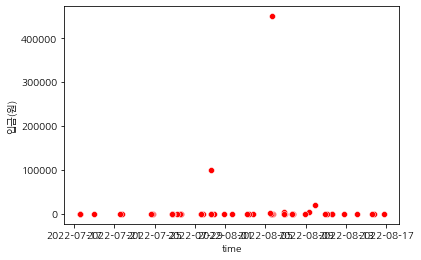

In [90]:
import seaborn as sns # scatterplot이 들어있는 모듈 seaborn을 sns라는 이름으로 불러옵니다. 

sns.scatterplot(data = df, x="time", y="입금(원)", color='red')

#### 3. 출금
마찬가지로 출금 값이 시간에 따라 어떻게 발생했는지 산점도로 표현해봅시다. 색깔은 초록색(green)으로 해주세요.
* 변환한 시간 형식의 값을 사용할 수 있습니다
* `sns.scatterplot`을 사용하면 그림을 그릴 수 있습니다.
    * `sns.scatterplot(data = df, x = "x축의 column 이름", y = "y축의 column 이름", color="색깔")

<AxesSubplot:xlabel='time', ylabel='출금(원)'>

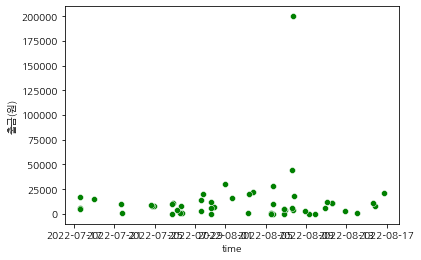

In [91]:
sns.scatterplot(data = df, x="time", y="출금(원)", color='green')

#### 4. 잔액
잔액 값이 시간에 따라 어떻게 변경됐는지 선그래프로 표현해봅시다. 색깔은 파란색(blue)으로 해주세요.
* 변환한 시간 형식의 값을 사용할 수 있습니다.
* `sns.lineplot`을 사용하면 그림을 그릴 수 있습니다.
    * `sns.lineplot(data = df, x = "x축의 column 이름", y = "y축의 column 이름", color="색깔")

<AxesSubplot:xlabel='time', ylabel='잔액(원)'>

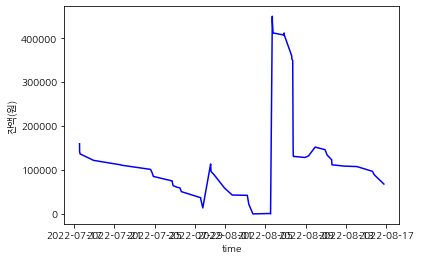

In [92]:
sns.lineplot(data = df, x="time", y="잔액(원)", color='blue')

#### 5. 모두 표현하기
위에서 그린 출금, 입금, 잔액 그래프를 모두 하나의 그래프에 합쳐서 그려 봅시다.
* 이때까지 작성한 코드를 한번엔 실행하면 결과를 볼 수 있습니다.

<AxesSubplot:xlabel='time', ylabel='입금(원)'>

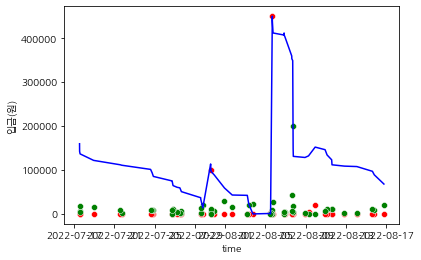

In [95]:
import seaborn as sns

sns.scatterplot(data = df, x="time", y="입금(원)", color='red')
sns.scatterplot(data = df, x="time", y="출금(원)", color='green')
sns.lineplot(data = df, x="time", y="잔액(원)", color='blue')

### 3. 최고값 찾기
영희는 출금 그래프에서 과도하게 돈이 많이 나간 정황을 포착할 수 있었습니다.  
그러나 그래프로는 정확한 출금 금액과 구매 품목을 알 수 없었기 때문에, 해당 출금 금액과 물품을 조회해보기로 했습니다.  
먼저 출금 금액의 최고값을 출력해보세요.
* `df["column 이름"].max` 함수를 사용하면 column의 최대 값을 출력할 수 있다.

In [96]:
max_val = df["출금(원)"].max()  # '출금' 열의 최대값을 max_val에 저장힙니다. 
print(max_val) # max_val 저장된 값을 출력합니다. 

200000.0

### 4. 최고값을 가지는 row 분석하기
영희는 무려 20만원이 빠져나간 정황을 포착했습니다! 철수 이자식... 이번에는 20만원으로 무엇을 했는지 찾아봅시다.   
출금값이 20만원인 행을 찾으면 어떤 물건을 샀는지 알 수 있을 것이다.
출금값이 최고값인 행을 출력하자
* `df[df[<column 이름>] == 값]`을 사용하면 그 지정된 열에서 주어진 값이 있는 모든 행을 가져올 수 있습니다.

In [97]:
df[df["출금(원)"] == max_val] # '출금' 열 중 값이 20만원(max_val)인 모든 행을 찾아 가져옵니다. 

,거래일자,거래시간,출금(원),입금(원),내용,잔액(원),time
13,2022-08-07,17:54:11,200000.0,0.0,영철백화점,148991.0,2022-08-07 17:54:11


## 4. 마무리

영희는 영철백화점에서 철수가 20만원어치의 고가 상품을 산 사실을 알게 되었습니다.  
영희는 철수를 용서할 수 없어졌습니다.
영희는 결제 금액 증거를 들고 철수에게 찾아가 따지기로 했습니다.  
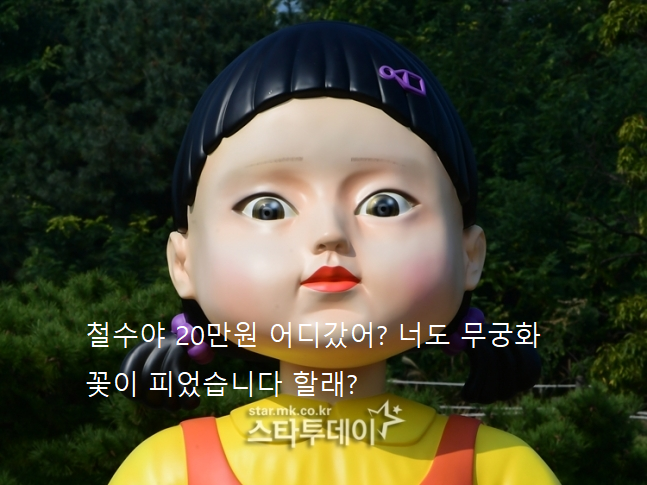

### 4.1. 해피앤딩

사실은 말이야...   
철수는 주머니에서 선물을 꺼내들었다. 영희가 그토록 가지고 싶어했던 립스틱이었다.  
"우리 결혼기념일이잖아"  
영희는 철수에게 감동하여 자신이 오해했음을 사과했습니다. ^0^  
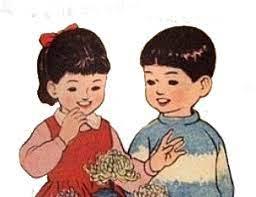

### 4.2. 해피앤딩..?

사실은 말이야...  
철수는 주머니에서 닌텐도 스위치를 꺼내들었습니다.    
"이것도 샀어..당근에서 싸게 판다길래... 그래도 싸게 샀으니깐 잘했지?ㅎㅎ"  
결국 영희는 극대노하여 철수를 혼냈다고 합니다...  
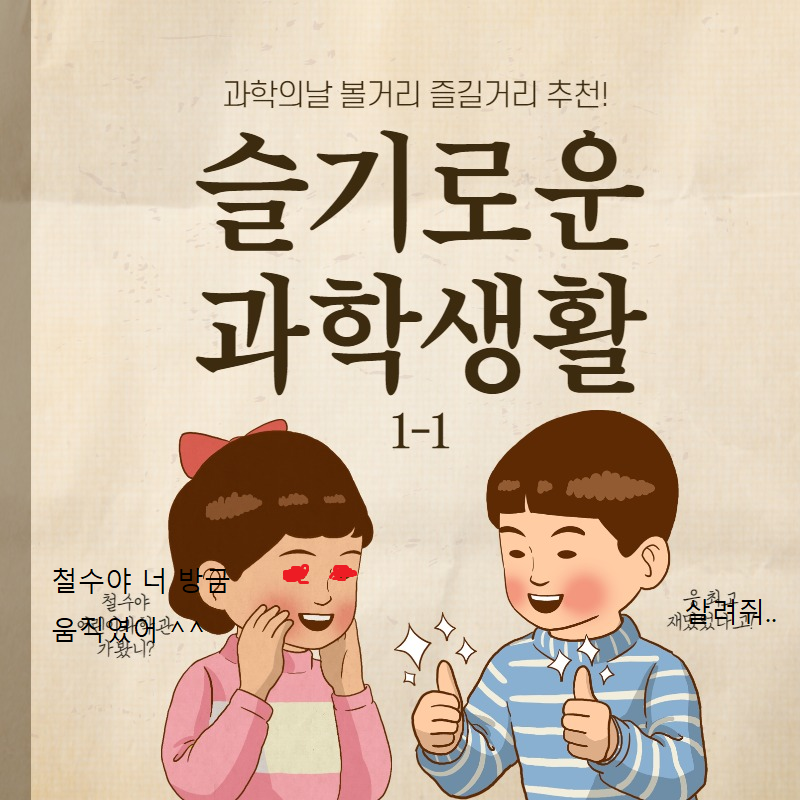